In [2]:
!pip install transformers

### Text Classification

In [3]:
!pip install --upgrade transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.2
    Uninstalling transformers-4.57.2:
      Successfully uninstalled transformers-4.57.2


In [4]:
import pandas as pd
from transformers import pipeline

In [5]:
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [6]:
text = 'It was horrible. It ruined our whole day'
result = classifier(text)
df = pd.DataFrame(result)

In [7]:
df

,label,score
0,NEGATIVE,0.999807


### Question - Answering

In [8]:
qa = pipeline('question-answering')

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [9]:
text = '''The tiger (Panthera tigris) is a large cat and a member of the genus Panthera native to Asia. It has a powerful, muscular body with a large head and paws, a long tail and orange fur with black, mostly vertical stripes. It is traditionally classified into nine recent subspecies, though some recognise only two subspecies, mainland Asian tigers and the island tigers of the Sunda Islands.

Throughout the tiger's range, it inhabits mainly forests, from coniferous and temperate broadleaf and mixed forests in the Russian Far East and Northeast China to tropical and subtropical moist broadleaf forests on the Indian subcontinent and Southeast Asia. The tiger is an apex predator and preys mainly on ungulates, which it takes by ambush. It lives a mostly solitary life and occupies home ranges, defending these from individuals of the same sex. The range of a male tiger overlaps with that of multiple females with whom he mates. Females give birth to usually two or three cubs that stay with their mother for about two years. When becoming independent, they leave their mother's home range and establish their own.

Since the early 20th century, tiger populations have lost at least 93% of their historic range and are locally extinct in West and Central Asia, in large areas of China and on the islands of Java and Bali. Today, the tiger's range is severely fragmented. It is listed as Endangered on the IUCN Red List of Threatened Species, as its range is thought to have declined by 53% to 68% since the late 1990s. Major threats to tigers are habitat destruction and fragmentation due to deforestation, poaching for fur and the illegal trade of body parts for medicinal purposes. Tigers are also victims of human–wildlife conflict as they attack and prey on livestock in areas where natural prey is scarce. The tiger is legally protected in all range countries. National conservation measures consist of action plans, anti-poaching patrols and schemes for monitoring tiger populations. In several range countries, wildlife corridors have been established and tiger reintroduction is planned.

The tiger is among the most popular of the world's charismatic megafauna. It has been kept in captivity since ancient times and has been trained to perform in circuses and other entertainment shows. The tiger featured prominently in the ancient mythology and folklore of cultures throughout its historic range and has continued to appear in culture worldwide.'''

In [10]:
question = 'Where is the tiger found?'
# question = 'What is Panthera tigris?'
# question = 'What is the fur color of a tiger?'

In [11]:
a = qa(question = question, context = text)
a

{'score': 0.8797865509986877, 'start': 88, 'end': 92, 'answer': 'Asia'}

In [12]:
ner = pipeline('ner', model='dslim/bert-base-NER')

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [13]:
result = ner(text)
df = pd.DataFrame(result)

In [14]:
df

,entity,score,index,word,start,end
0,B-MISC,0.627011,4,Panther,11,18
1,B-MISC,0.656084,20,Panther,69,76
2,I-MISC,0.504560,21,##a,76,77
3,B-LOC,0.999729,24,Asia,88,92
4,B-MISC,0.999399,71,Asian,331,336
5,B-LOC,0.998980,81,Sun,373,376
6,I-LOC,0.988173,82,##da,376,378
7,I-LOC,0.998739,83,Islands,379,386
8,B-LOC,0.985585,110,Russian,512,519
9,I-LOC,0.994686,111,Far,520,523


In [18]:
# ner = pipeline('ner', model='')
# result = ner(text)
# df = pd.DataFrame(result)

Translation

In [16]:
trans=pipeline('translation_en_to_fr')

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [32]:
text=trans('How are you? Welcome to Python Programming')
print(text)

[{'translation_text': 'Bienvenue à Python Programming'}]


In [45]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [46]:
model='facebook/nllb-200-distilled-600M'

In [47]:
tokenizer=AutoTokenizer.from_pretrained(model)
model=AutoModelForSeq2SeqLM.from_pretrained(model)

In [48]:
english_text='Natural Language processing is a fascinating field of Artificial Intelligence'

In [49]:
inputs=tokenizer(english_text, return_tensors='pt')

In [63]:
output = model.generate(**inputs, forced_bos_token_id=tokenizer.convert_tokens_to_ids('hin_Deva'), max_length=50)

In [64]:
decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
decoded_output

'प्राकृतिक भाषा प्रसंस्करण कृत्रिम बुद्धि का एक आकर्षक क्षेत्र है'

Text Generation Transformer

In [65]:
# import pandas as pd
# from transformers import pipeline
generator=pipeline('text-generation')

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [73]:
data=generator("I want to learn python programming so",max_length=30,num_return_sequences=1)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [72]:
print(data[0]['generated_text'])

I want to learn python programming so I can learn other languages and help others learn how to use Python.

My aim was to do this as much as possible.

My goal was to get as much information out of a beginner as possible.

Once I knew where to go, I began to learn more and more.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to use python.

I learned how to


Conversational Transformers

In [75]:
from transformers import pipeline, Conversation

ImportError: cannot import name 'Conversation' from 'transformers' (/usr/local/lib/python3.12/dist-packages/transformers/__init__.py)

In [86]:
vqa=pipeline('visual-question-answering')

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [87]:
from PIL import Image

In [88]:
img = Image.open('cat.jpg')

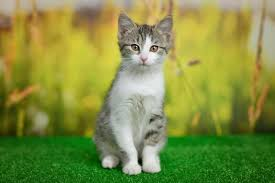

In [89]:
img

In [99]:
ans = vqa(image=img, question='What is in the image?')

In [100]:
ans[0]['answer']

'cat'

In [101]:
ans = vqa(image=img, question='What color is the cat?')

In [102]:
ans[0]['answer']

'gray'

In [103]:
ans = vqa(image=img, question='What is the cat sitting on?')

In [104]:
ans[0]['answer']

'grass'

In [105]:
img = Image.open('catanddog.jpg')

In [107]:
ans = vqa(image=img, question='What is in the image?')
ans

[{'score': 0.24886727333068848, 'answer': 'cat'},
 {'score': 0.14862947165966034, 'answer': 'cats'},
 {'score': 0.08121059089899063, 'answer': 'dog'},
 {'score': 0.05468949303030968, 'answer': 'dog and cat'},
 {'score': 0.0342801958322525, 'answer': 'cat and dog'}]

In [108]:
ans = vqa(image=img, question='How many animals are in the image?')
ans

[{'score': 0.9841060042381287, 'answer': '2'},
 {'score': 0.012091297656297684, 'answer': '3'},
 {'score': 0.010551205836236477, 'answer': '1'},
 {'score': 0.0016873795539140701, 'answer': 'cat'},
 {'score': 0.0010820826282724738, 'answer': 'cat and dog'}]

In [109]:
ans = vqa(image=img, question='What is the object in the background of the image?')
ans

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[{'score': 0.3801761567592621, 'answer': 'chair'},
 {'score': 0.14645324647426605, 'answer': 'table'},
 {'score': 0.13388384878635406, 'answer': 'lamp'},
 {'score': 0.047009605914354324, 'answer': 'tv'},
 {'score': 0.042586974799633026, 'answer': 'desk'}]

In [110]:
ans = vqa(image=img, question='What are the colors of the animals in the image?')
ans

[{'score': 0.3135479688644409, 'answer': 'gray'},
 {'score': 0.18488956987857819, 'answer': 'brown and black'},
 {'score': 0.13611741364002228, 'answer': 'brown'},
 {'score': 0.04715412110090256, 'answer': 'gray and white'},
 {'score': 0.046311672776937485, 'answer': 'gray and black'}]

Text to Speech

In [111]:
pipe=pipeline('text-to-speech',model='suno/bark-small')

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [116]:
text='This is a test and I just took a long pause'
output=pipe(text, )

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [117]:
from IPython.display import Audio
Audio(output['audio'], rate=output['sampling_rate'])

Text Summarization

In [118]:
text='''Linguistics is the scientific study of language, analyzing its structure, history, and use in areas like phonetics, syntax, semantics, and pragmatics. Linguists study how languages are formed, acquired, and change over time, investigating the underlying principles and rules that govern all human languages, whether spoken or signed. The field encompasses subdisciplines such as sociolinguistics, psycholinguistics, and historical linguistics to understand the complex relationship between language, the mind, and society.
Key areas of study
Phonetics and Phonology: The study of speech sounds, including their production and the sound patterns of a language.
Morphology: The study of word structure.
Syntax: The study of sentence structure and grammar.
Semantics: The study of meaning in language.
Pragmatics: The study of how context influences meaning in language use.
Subdisciplines
Psycholinguistics: Studies the relationship between language and the human brain, including language acquisition and processing.
Sociolinguistics: Examines how language is used in different social contexts and how it relates to social factors.
Historical Linguistics: Studies the history of languages and how they change over time.
Applied Linguistics: Uses linguistic knowledge to solve real-world problems, such as in language teaching and translation.
How linguists study language
Linguistics uses scientific methods, including observation, hypothesis formation, and analysis.
Research can involve analyzing existing texts, recordings, or historical documents, as well as conducting experiments and interviews.
Linguists focus on how language is actually used, not just on "correct" or standardized forms.
The field is concerned with the structure of language itself, but also with how it is acquired, used, and its place in society and history.'''

In [119]:
text_summarizer=pipeline('summarization')
output=text_summarizer(text,max_length=60,clean_up_tokenization_spaces=True)
# print(output[0]['summary'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


KeyError: 'summary'

In [120]:
output

[{'summary_text': ' Linguists study how languages are formed, acquired, and change over time. The field is concerned with the structure of language itself, but also with how it is acquired, used, and its place in society and history. Subdisciplines include sociolinguistics, psychol'}]